In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
df.shape   # (rows = 36275, cols= 19)

(36275, 19)

In [13]:
# check null
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
# check data types
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [14]:
# check data consistency

In [15]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [16]:
# Avg price per room cant be 0
# Num of adults and Num of children cant be 0
# Num of week nights and  num of weekend nights cant be 0

In [17]:
df[df['avg_price_per_room']==0].shape

(545, 19)

In [18]:
df = df[df['avg_price_per_room']>0]
df.shape

(35730, 19)

In [25]:
print(df[df['no_of_adults']==0].shape)
print(df[df['no_of_children']==0].shape)
print(df[(df['no_of_adults']==0) &  (df['no_of_children']==0)].shape)
print(df[(df['no_of_adults']==0) &  (df['no_of_children']!=0)].shape)


(135, 19)
(33067, 19)
(0, 19)
(135, 19)


In [26]:
df = df[df['no_of_adults']>0]
df.shape

(35595, 19)

In [30]:
print(df[df['no_of_week_nights']==0].shape)
print(df[df['no_of_weekend_nights']==0].shape)
print(df[(df['no_of_week_nights']==0) & (df['no_of_weekend_nights']==0)].shape)

(2258, 19)
(16393, 19)
(0, 19)


#### Separate Num and Cat features

In [37]:
num_cols = df.select_dtypes(exclude='object').columns 
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
print(num_cols)

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


#### EDA

#### Univariate - Cat Cols - Countplot

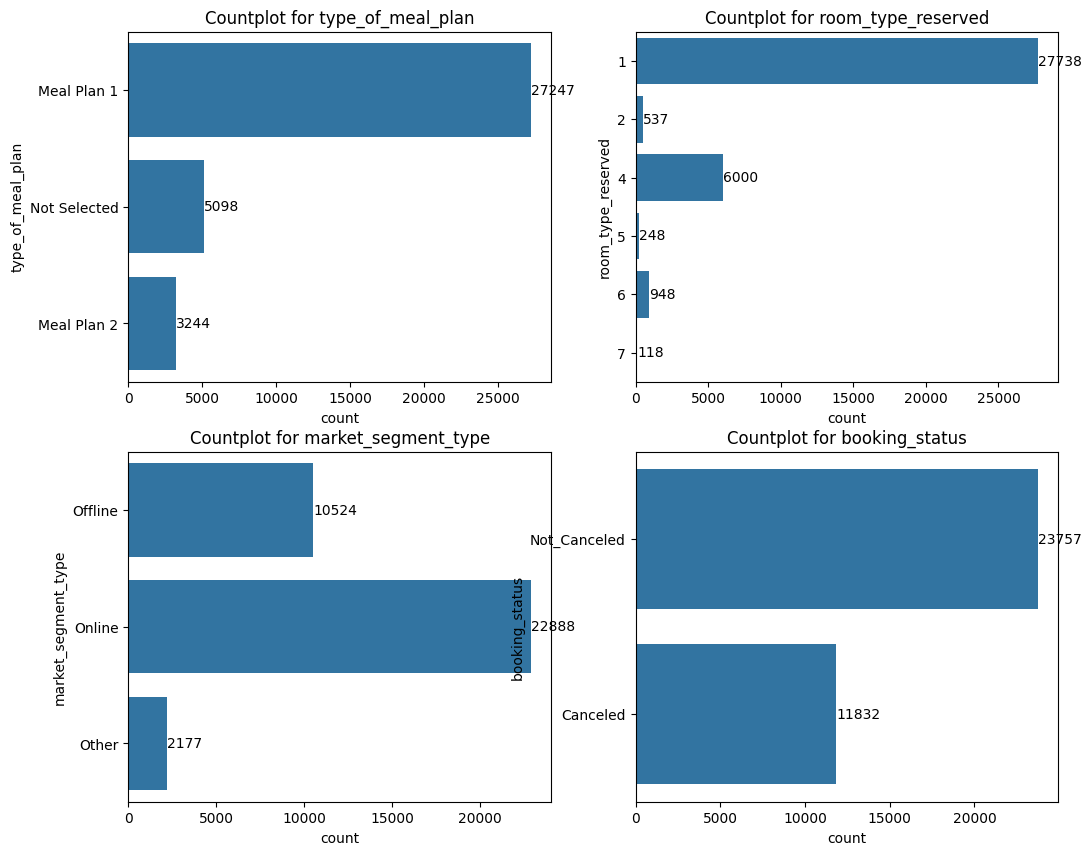

In [83]:
cols = cat_cols[1:]
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data=df,y=cols[i])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

In [40]:
df = df[df['type_of_meal_plan'] != 'Meal Plan 3']
df.shape

(35594, 19)

In [42]:
mst_map = {'Aviation' :'Other','Complementary' :'Other','Corporate':'Other'}
df['market_segment_type'] = df['market_segment_type'].replace(mst_map)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14128\1107693561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_segment_type'] = df['market_segment_type'].replace(mst_map)


In [43]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    27738
Room_Type 4     6000
Room_Type 6      948
Room_Type 2      537
Room_Type 5      248
Room_Type 7      118
Room_Type 3        5
Name: count, dtype: int64

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
df['room_type_reserved'] = df['room_type_reserved'].str.replace('Room_Type ','')
df['room_type_reserved'].value_counts()

room_type_reserved
1    27738
4     6000
6      948
2      537
5      248
7      118
Name: count, dtype: int64

In [45]:
print(df.shape)
df = df[df['room_type_reserved']!='3']
print(df.shape)

(35594, 19)
(35589, 19)


In [49]:
df['room_type_reserved'] = pd.to_numeric(df['room_type_reserved'])

In [50]:
len(num_cols)

14

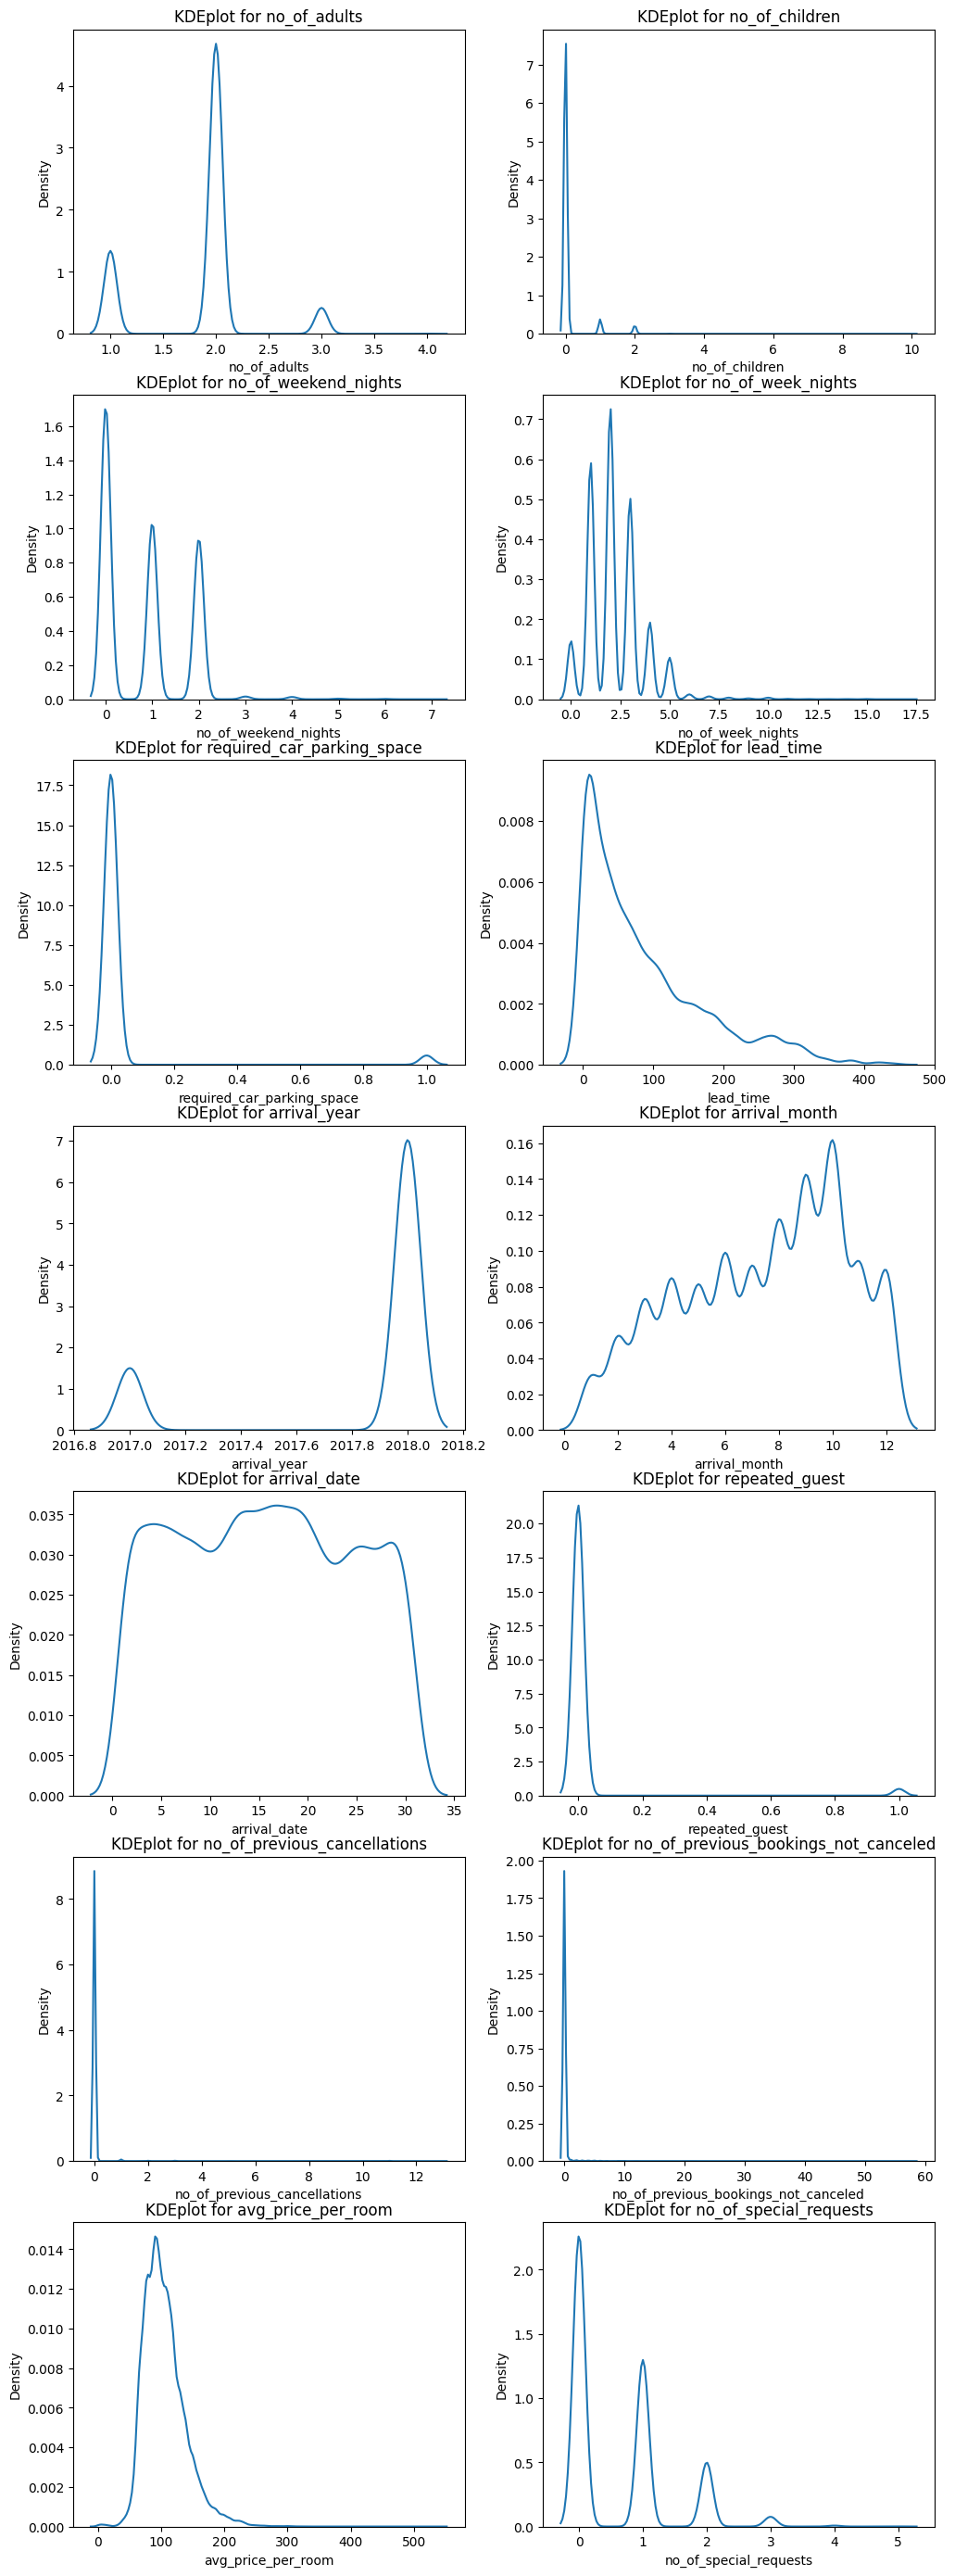

In [52]:
cols = num_cols
plt.figure(figsize=(12,35))
for i in range(len(cols)):
    plt.subplot(7,2,i+1)
    sns.kdeplot(data=df,x=cols[i])
    plt.title(f'KDEplot for {cols[i]}')
plt.show()

#### Corr

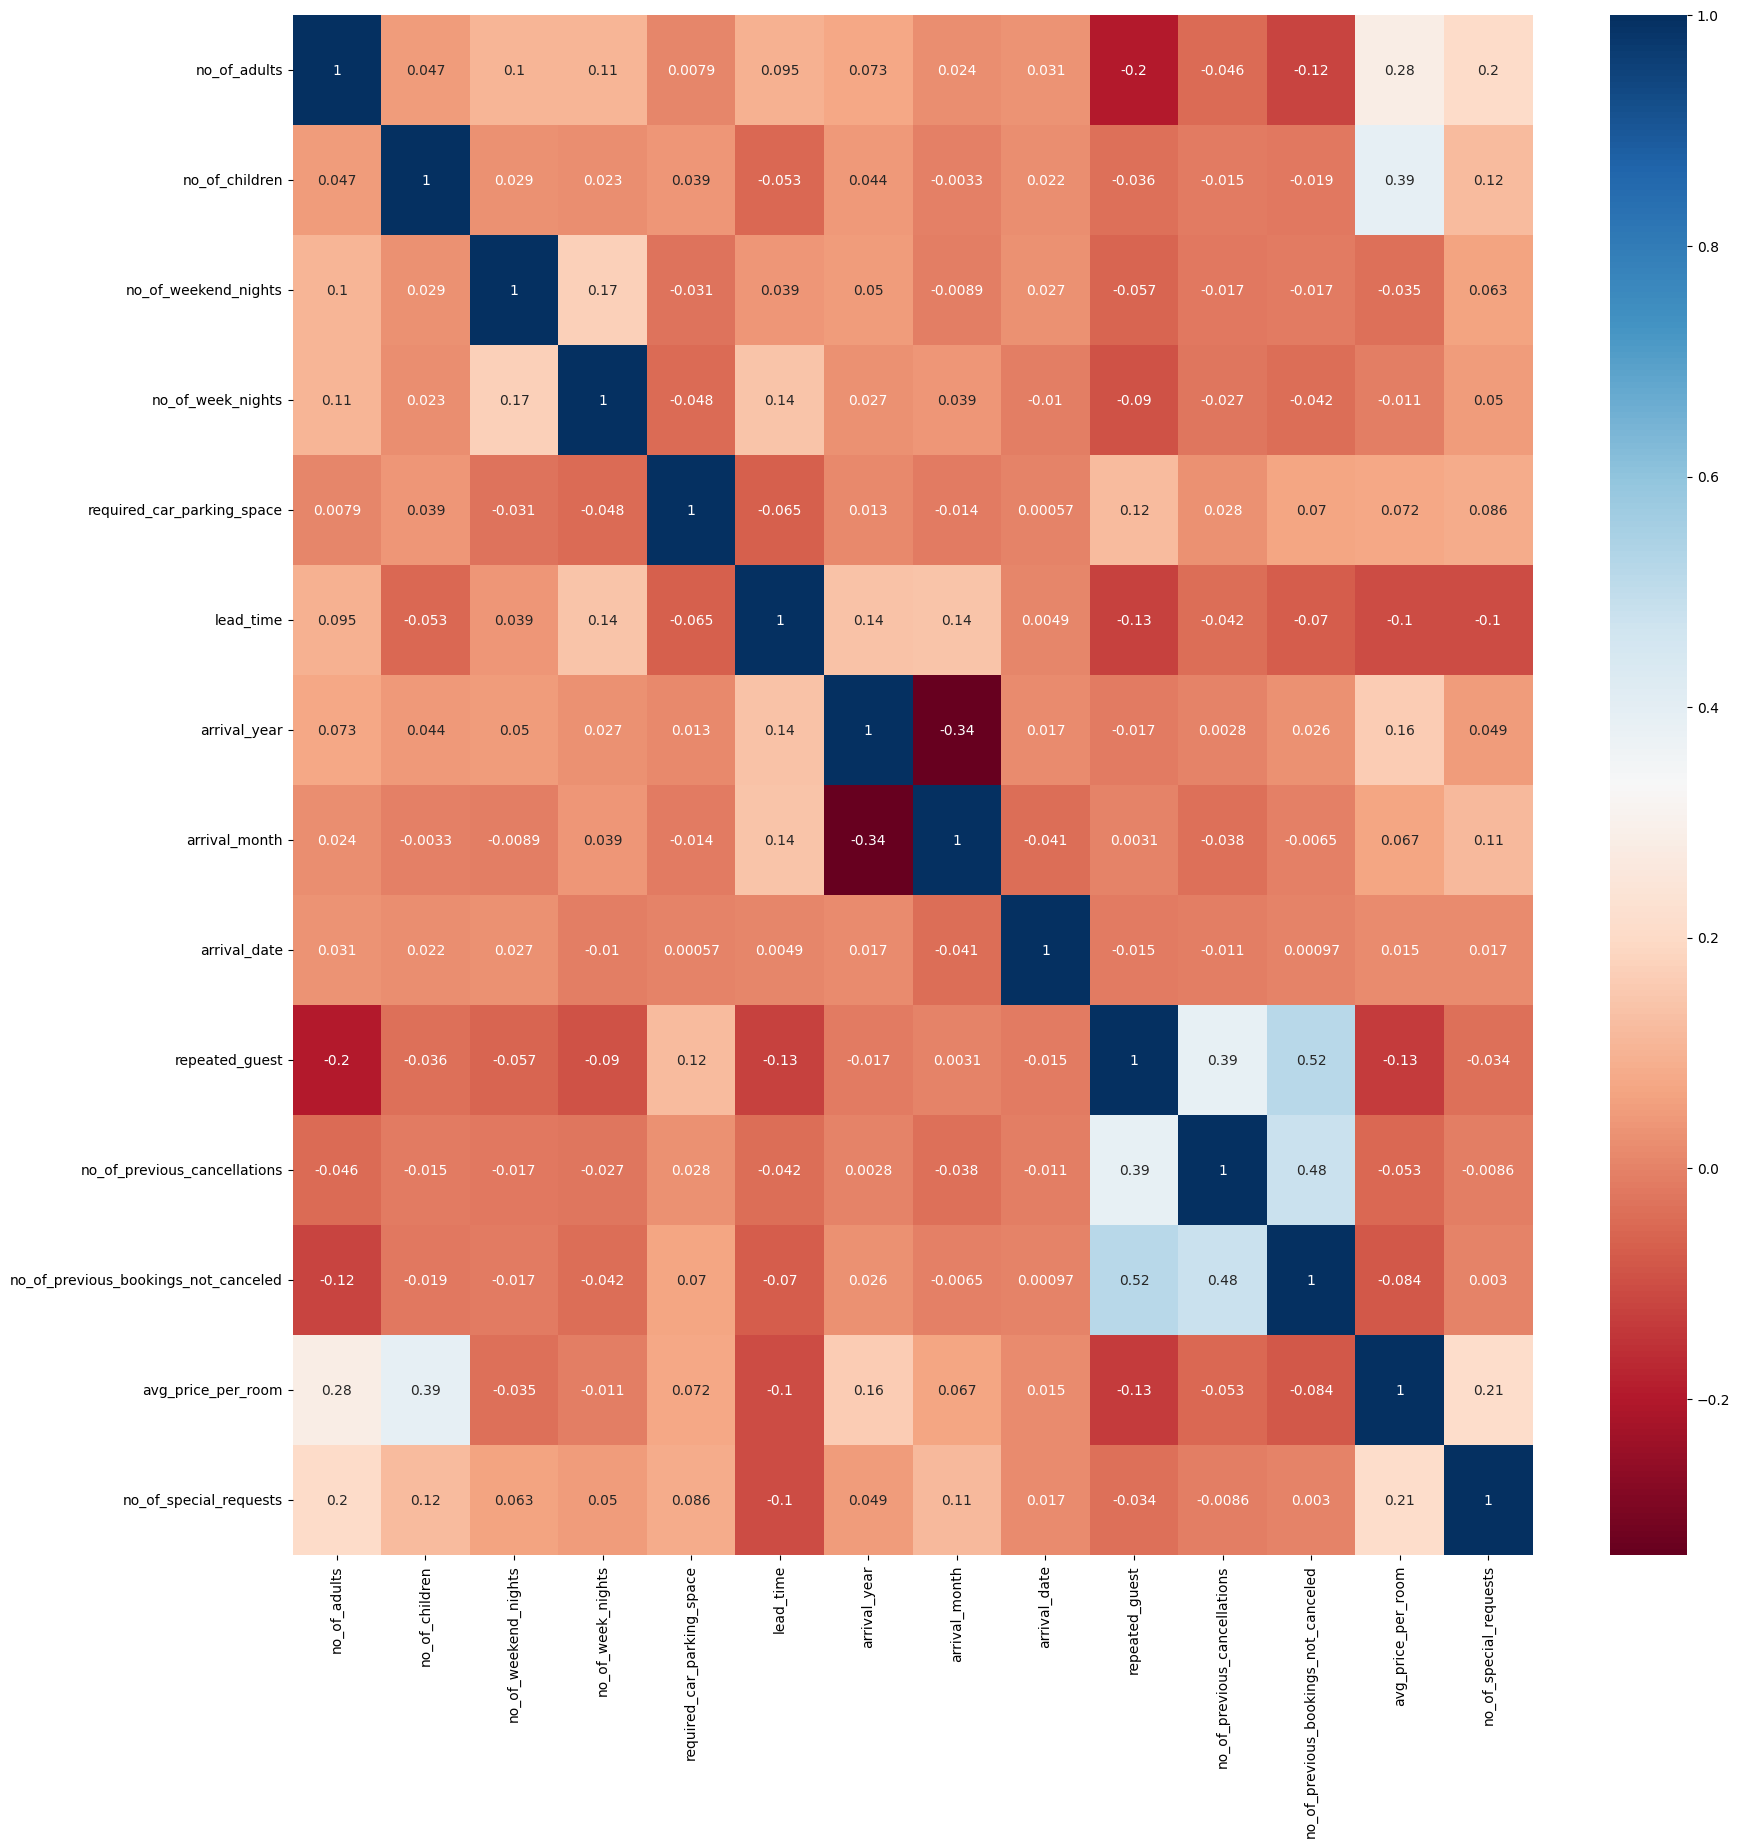

In [53]:
corr = df[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Outlier Treatment

In [73]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99,0.995]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,99.5%,max
no_of_adults,1.0,1.0,1.00,1.0,1.0,2.0,3.000,3.0000,3.0,3.000,3.00,4.00
no_of_children,0.0,0.0,0.00,0.0,0.0,0.0,1.000,1.0000,2.0,2.000,2.00,2.00
no_of_weekend_nights,0.0,0.0,0.00,0.0,0.0,1.0,2.000,2.0000,2.0,2.000,4.00,4.00
no_of_week_nights,0.0,0.0,0.00,0.0,0.0,2.0,5.000,5.0000,5.0,6.000,8.00,8.00
required_car_parking_space,0.0,0.0,0.00,0.0,0.0,0.0,0.000,1.0000,1.0,1.000,1.00,1.00
lead_time,0.0,0.0,0.00,0.0,1.0,58.0,273.000,301.0000,315.0,346.000,377.00,377.00
arrival_year,2017.0,2017.0,2017.00,2017.0,2017.0,2018.0,2018.000,2018.0000,2018.0,2018.000,2018.00,2018.00
arrival_month,1.0,1.0,1.00,2.0,2.0,8.0,12.000,12.0000,12.0,12.000,12.00,12.00
arrival_date,1.0,1.0,1.00,1.0,2.0,16.0,29.000,30.0000,30.0,31.000,31.00,31.00
repeated_guest,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0000,1.0,1.000,1.00,1.00


In [57]:
df1 = df.copy()

In [58]:
df['avg_price_per_room'] = np.where(df['avg_price_per_room'] <51.0, 51.0,df['avg_price_per_room'])

In [59]:
right_sk_cols = ['no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time', 
                'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']


In [61]:
for i in right_sk_cols:
    upper = df[i].quantile(0.995)
    # print(i,upper)
    df[i] = np.where(df[i] > upper, upper, df[i])

In [62]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99,0.995]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,99.5%,max
no_of_adults,1.0,1.0,1.00,1.0,1.0,2.0,3.000,3.0000,3.0,3.000,3.00,4.00
no_of_children,0.0,0.0,0.00,0.0,0.0,0.0,1.000,1.0000,2.0,2.000,2.00,2.00
no_of_weekend_nights,0.0,0.0,0.00,0.0,0.0,1.0,2.000,2.0000,2.0,2.000,4.00,4.00
no_of_week_nights,0.0,0.0,0.00,0.0,0.0,2.0,5.000,5.0000,5.0,6.000,8.00,8.00
required_car_parking_space,0.0,0.0,0.00,0.0,0.0,0.0,0.000,1.0000,1.0,1.000,1.00,1.00
lead_time,0.0,0.0,0.00,0.0,1.0,58.0,273.000,301.0000,315.0,346.000,377.00,377.00
arrival_year,2017.0,2017.0,2017.00,2017.0,2017.0,2018.0,2018.000,2018.0000,2018.0,2018.000,2018.00,2018.00
arrival_month,1.0,1.0,1.00,2.0,2.0,8.0,12.000,12.0000,12.0,12.000,12.00,12.00
arrival_date,1.0,1.0,1.00,1.0,2.0,16.0,29.000,30.0000,30.0,31.000,31.00,31.00
repeated_guest,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0000,1.0,1.000,1.00,1.00


#### Encoding

In [63]:
cat_cols

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [64]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    23757
Canceled        11832
Name: count, dtype: int64

In [67]:
cols_2encode = ['type_of_meal_plan','market_segment_type']
df_dummies = pd.get_dummies(data=df,columns=cols_2encode,dtype=int,drop_first=True)
print(df_dummies.shape)

(35589, 21)


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
# XGboost reuqires target variable (for classification) to be label Encoder

In [71]:
lb = LabelEncoder()
df_dummies['booking_status'] = lb.fit_transform(df_dummies['booking_status'])

In [74]:
df_dummies['booking_status'].value_counts()

booking_status
1    23757
0    11832
Name: count, dtype: int64

In [72]:
df_dummies.dtypes.value_counts()

int64      13
float64     7
object      1
Name: count, dtype: int64

#### Select x and y

In [75]:
x = df_dummies.drop(['Booking_ID','booking_status'],axis=1)
y = df_dummies['booking_status']  # 0- cancelled, 1 - not cancelled
print(x.shape)

(35589, 19)


#### Split into train and test

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#### Function for Model Evaluation

In [78]:
from sklearn.metrics import *

In [80]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    train_acc = model.score(x_train,y_train) 
    test_acc = model.score(x_test,y_test)
    pre0 = precision_score(y_test,ypred,pos_label=0)
    pre1 = precision_score(y_test,ypred,pos_label=1)
    rec0 = recall_score(y_test,ypred,pos_label=0)
    rec1 = recall_score(y_test,ypred,pos_label=1)
    eval_res = pd.DataFrame({'Train Acc':train_acc,'Test_Acc':test_acc,
                             'Pre0':pre0,'Pre1':pre1,'Rec0':rec0,'Rec1':rec1},index=[mname])
    return ypred, eval_res

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


#### Log Reg

In [82]:
lr1 = LogisticRegression(max_iter=100000)
ypred_l1,lr1_res = eval_model(lr1,'LogReg')
lr1_res

[[2255 1276]
 [ 808 6338]]


,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
LogReg,0.796564,0.804814,0.736206,0.832414,0.638629,0.88693


#### DT

In [84]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=10)
ypred_dt1,dt1_res = eval_model(dt1,'DT')
dt1_res

[[2389 1142]
 [ 511 6635]]


,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
DT,0.843208,0.845181,0.823793,0.853157,0.676579,0.928491


#### RF

In [87]:
rf1 = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=7,min_samples_split=9)
ypred_rf1,rf1_res = eval_model(rf1,'RF')
rf1_res

[[2244 1287]
 [ 304 6842]]


,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
RF,0.847423,0.850988,0.880691,0.841678,0.635514,0.957459


#### KNN

In [88]:
knn1 = KNeighborsClassifier(n_neighbors=11)
ypred_knn1, knn1_res =  eval_model(knn1,'KNN')
knn1_res

[[2056 1475]
 [ 639 6507]]


,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
KNN,0.828195,0.802004,0.762894,0.815209,0.582271,0.910579


#### AdaBoost Classifier

In [90]:
ada1 = AdaBoostClassifier(n_estimators=80)
ypred_ada1 , ada1_res = eval_model(ada1,'AdaBoost_Cls')
ada1_res

[[2265 1266]
 [ 762 6384]]


,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
AdaBoost_Cls,0.803067,0.810059,0.748266,0.83451,0.641461,0.893367


#### GradientBoost

In [92]:
grb1 = GradientBoostingClassifier(n_estimators=95,max_depth=7,min_samples_split=10)
ypred_grb1 , grb1_res = eval_model(grb1,'GradBoost_Cls')
grb1_res

[[2795  736]
 [ 402 6744]]


,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
GraBoost_Cls,0.910043,0.893416,0.874257,0.901604,0.79156,0.943745


#### XGBoost

In [91]:
xgb1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                    eta=0.3,reg_lambda=0.2,gamma=0.15)
ypred_xgb1 , xgb1_res = eval_model(xgb1,'XGBoost_Cls')
xgb1_res

[[2824  707]
 [ 438 6708]]


,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
XGBoost_Cls,0.928268,0.89276,0.865727,0.904653,0.799773,0.938707


In [93]:
all_res = pd.concat([lr1_res,dt1_res,knn1_res,rf1_res,ada1_res,grb1_res,xgb1_res])
all_res

,Train Acc,Test_Acc,Pre0,Pre1,Rec0,Rec1
LogReg,0.796564,0.804814,0.736206,0.832414,0.638629,0.886930
DT,0.843208,0.845181,0.823793,0.853157,0.676579,0.928491
KNN,0.828195,0.802004,0.762894,0.815209,0.582271,0.910579
RF,0.847423,0.850988,0.880691,0.841678,0.635514,0.957459
AdaBoost_Cls,0.803067,0.810059,0.748266,0.834510,0.641461,0.893367
GraBoost_Cls,0.910043,0.893416,0.874257,0.901604,0.791560,0.943745
XGBoost_Cls,0.928268,0.892760,0.865727,0.904653,0.799773,0.938707
